# When does praying in public make others uncomfortable?

This is the data behind the story [When Does Praying In Public Make Others Uncomfortable?](https://fivethirtyeight.com/features/when-does-praying-in-public-make-others-uncomfortable/).
<br><br/>
Data was collected using a [SurveyMonkey](https://surveymonkey.com) poll, conducted between July 29 and August 1, 2016. 661 gave responses to questions about public displays of religion.

In [1]:
# The usual suspects
import itertools
import numpy as np
import pandas as pd
import missingno as msn
import cleaner2 as clr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Getting the data
df = pd.read_csv('religion-survey-results.csv')

In [3]:
df.shape

(1040, 48)

In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Columns: 48 entries, What is your present religion, if any? to US Region
dtypes: object(48)
memory usage: 390.1+ KB


### Step 1: Preprocessing

#### 1.1. Columns

Some columns are badly labelled and need to have more descriptive labels.

In [5]:
df.rename(columns={'Unnamed: 1': 'Which church do you attend?'}, inplace=True)

#### 1.2. Redundant data entries

The first column of our data has a single entry for the whole row.

In [6]:
df.drop(df.index[[0]], inplace=True)
df.shape

(1039, 48)

#### 1.3. Text case

Most of our data is textual. We want to have a uniform letter-case for all the entries. This will reduce errors in bad entries.

In [7]:
clr.word_case(dataframe=df)

Done.



,"What is your present religion, if any?",Which church do you attend?,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation",...,How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
1,None Of These,Wesleyan Christian,No,Weekly Or More,A Few Times Per Week,Not Applicable To My Religious Beliefs,A Few Times Per Month,A Few Times Per Week,Never,A Few Times Per Month,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$0 To $9,999",East North Central
2,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Comfortable,Somewhat Comfortably,Very Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$10,000 To $24,999",Middle Atlantic
3,Protestant,NaN,No,Weekly Or More,A Few Times Per Month,Never,Once A Year Or Less,A Few Times Per Month,A Few Times Per Month,A Few Times Per Month,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$25,000 To $49,999",East North Central
4,Muslim,NaN,No,Weekly Or More,Every Day,A Few Times Per Month,Never,Once A Month Or Less,Once A Month Or Less,Never,...,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,18 - 29,Male,"$0 To $9,999",South Atlantic
5,None Of These,Working On Christianity. Orthodox Seemed Too C...,No,Weekly Or More,Never,Never,Never,Once A Month Or Less,A Few Times Per Month,Once A Month Or Less,...,Not So Comfortable,Not So Comfortable,Not So Comfortable,Not So Comfortable,Very Comfortable,Somewhat Comfortably,18 - 29,Male,"$75,000 To $99,999",Pacific


We also need to fix the columns. We'll put them in sentence-case.

In [8]:
# Capitalizing the columns
df.columns = df.columns.str.capitalize()

# Fixing columns
df.rename(columns={'Us region' : 'US region'}, inplace=True)

#### 1.4. Missing values

We have great deal of missing values that compromise the quality of our data. We need to impute dummy values inplace of `np.Nan` values.

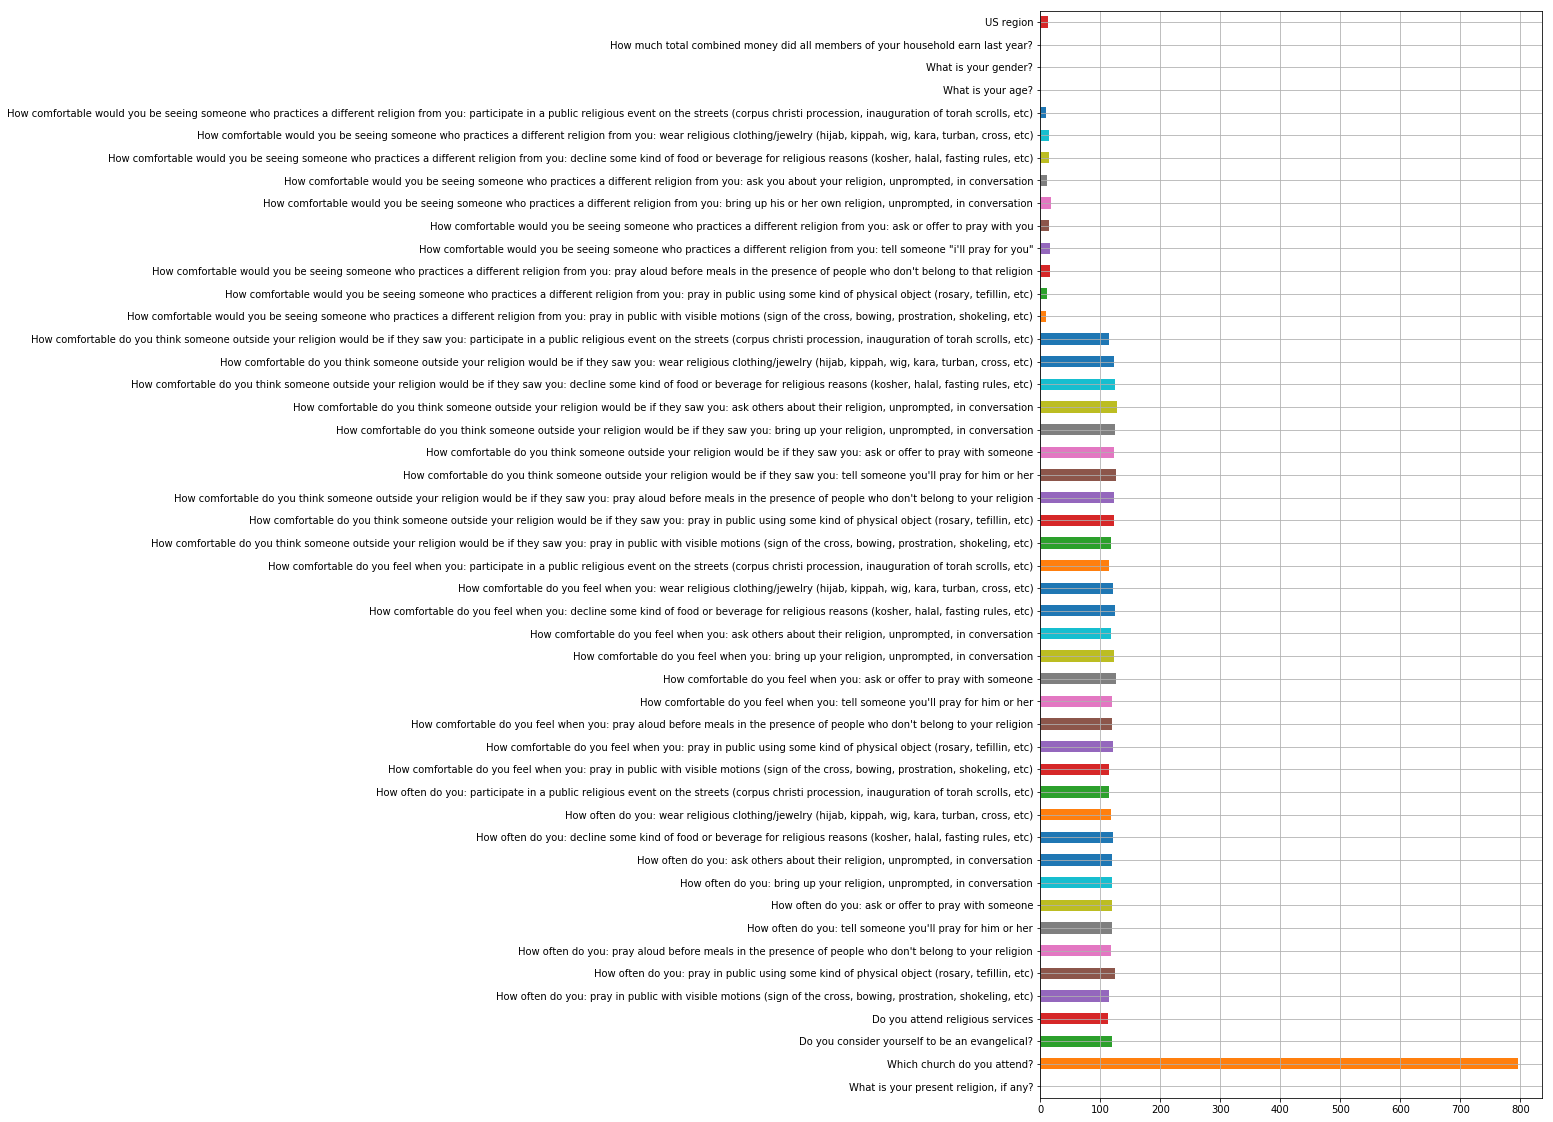

In [9]:
df.isnull().sum().plot.barh(figsize=(9, 20))
plt.grid()

The column _"Which church do you attend?"_ has the highest number of missing values. Close to 800 values are missing. We will use ***cleaner's*** `remove_columns` function to lower the number of variables with too many missing values.

In [10]:
clr.remove_columns(df)

Initial shape of the dataset:(1039, 48)

The following will be removed: Which church do you attend?

Final shape of the dataset:(1039, 47)


,"What is your present religion, if any?",Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: pray aloud before meals in the presence of people who don't belong to your religion,How often do you: tell someone you'll pray for him or her,How often do you: ask or offer to pray with someone,"How often do you: bring up your religion, unprompted, in conversation","How often do you: ask others about their religion, unprompted, in conversation",...,How comfortable would you be seeing someone who practices a different religion from you: ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: participate in a public religious event on the streets (corpus christi procession, inauguration of torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your household earn last year?,US region
1,None Of These,No,Weekly Or More,A Few Times Per Week,Not Applicable To My Religious Beliefs,A Few Times Per Month,A Few Times Per Week,Never,A Few Times Per Month,A Few Times Per Month,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$0 To $9,999",East North Central
2,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Comfortable,Somewhat Comfortably,Very Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$10,000 To $24,999",Middle Atlantic
3,Protestant,No,Weekly Or More,A Few Times Per Month,Never,Once A Year Or Less,A Few Times Per Month,A Few Times Per Month,A Few Times Per Month,Once A Month Or Less,...,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,Extremely Comfortable,18 - 29,Male,"$25,000 To $49,999",East North Central
4,Muslim,No,Weekly Or More,Every Day,A Few Times Per Month,Never,Once A Month Or Less,Once A Month Or Less,Never,Once A Year Or Less,...,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,Very Comfortable,18 - 29,Male,"$0 To $9,999",South Atlantic
5,None Of These,No,Weekly Or More,Never,Never,Never,Once A Month Or Less,A Few Times Per Month,Once A Month Or Less,Once A Year Or Less,...,Not So Comfortable,Not So Comfortable,Not So Comfortable,Not So Comfortable,Very Comfortable,Somewhat Comfortably,18 - 29,Male,"$75,000 To $99,999",Pacific


As expected, the column _"Which church do you attend?"_ was the only one that was removed.

In [11]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(1039, 47)
(756, 47)


In [12]:
assert (df.isnull().sum().all() == 0)

We now have a clean dataset with no missing values.

#### 1.5. Bad entries

In [13]:
clr.unique_value_counts(df)

 Column Name:  What is your present religion, if any? 

 ['None Of These' 'Protestant' 'Muslim' 'Agnostic' 'Roman Catholic' 'Hindu'
 'Jewish' 'Orthodox Christian' 'Mormon' 'Buddhist'] 

 Column Name:  Do you consider yourself to be an evangelical? 

 ['No' 'Yes'] 

 Column Name:  Do you attend religious services 

 ['Weekly Or More' 'Less Than Weekly' 'Never'] 

 Column Name:  How often do you: pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc) 

 ['A Few Times Per Week' 'A Few Times Per Month' 'Every Day' 'Never'
 'Once A Year Or Less' 'Once A Month Or Less'
 'Not Applicable To My Religious Beliefs'] 

 Column Name:  How often do you: pray in public using some kind of physical object (rosary, tefillin, etc) 

 ['Not Applicable To My Religious Beliefs' 'Never' 'A Few Times Per Month'
 'Once A Year Or Less' 'A Few Times Per Week' 'Every Day'
 'Once A Month Or Less'] 

 Column Name:  How often do you: pray aloud before meals in the presence of pe

The column _"How much total combined money did all members of your household earn last year?"_ has `$` signs and may be interpreted wrongly in our analysis.

In [14]:
# Replacing '$' signs
series, new_series = df['How much total combined money did all members of your household earn last year?'], list()
obj = (i for i in series.values)
try:
    while True:
        old = obj.__next__()
        new = old.replace('$', '')
        new_series.append(new)
except:
    pass

df['How much total combined money did all members of your household earn last year?'] = new_series
df['How much total combined money did all members of your household earn last year?'] = df['How much total combined money did all members of your household earn last year?'].str.capitalize()
df['How much total combined money did all members of your household earn last year?'].value_counts()

25,000 to 49,999        136
50,000 to 74,999        122
Prefer not to answer     97
75,000 to 99,999         81
10,000 to 24,999         77
0 to 9,999               71
100,000 to 124,999       59
125,000 to 149,999       43
200,000 and up           32
150,000 to 174,999       29
175,000 to 199,999        9
Name: How much total combined money did all members of your household earn last year?, dtype: int64

### Step 2: Exploration

#### 2.1. What is your present religion, if any?

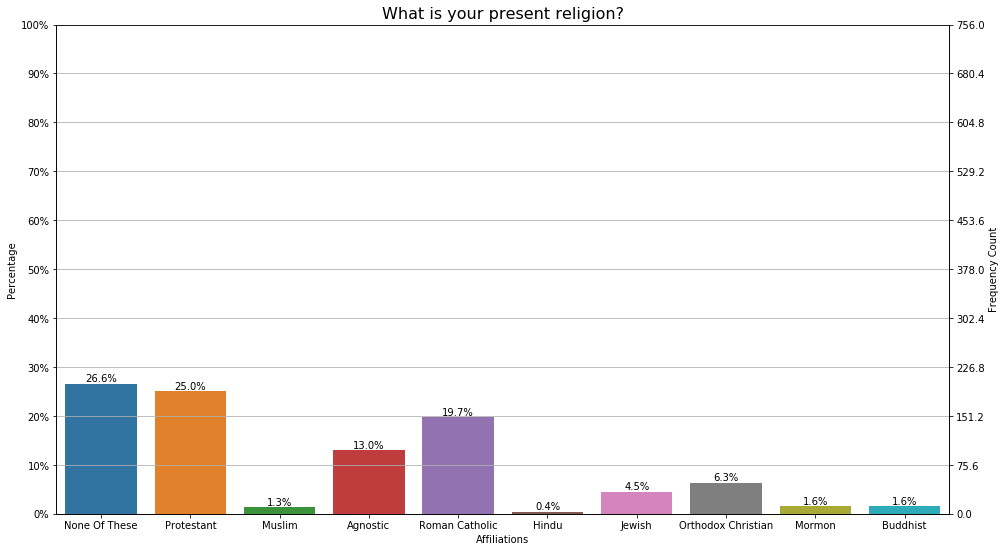

In [15]:
clr.frequency_plot(dataframe=df, 
             x='What is your present religion, if any?', 
             title='What is your present religion?', 
             xlabel='Affiliations')

Representation of religious affiliation has the greatest number of respondents being unidentified (represented by _"None Of These"_). This is followed by Protestants, Roman Catholics and Agnostics.

#### 2.1.1. Present religion by gender

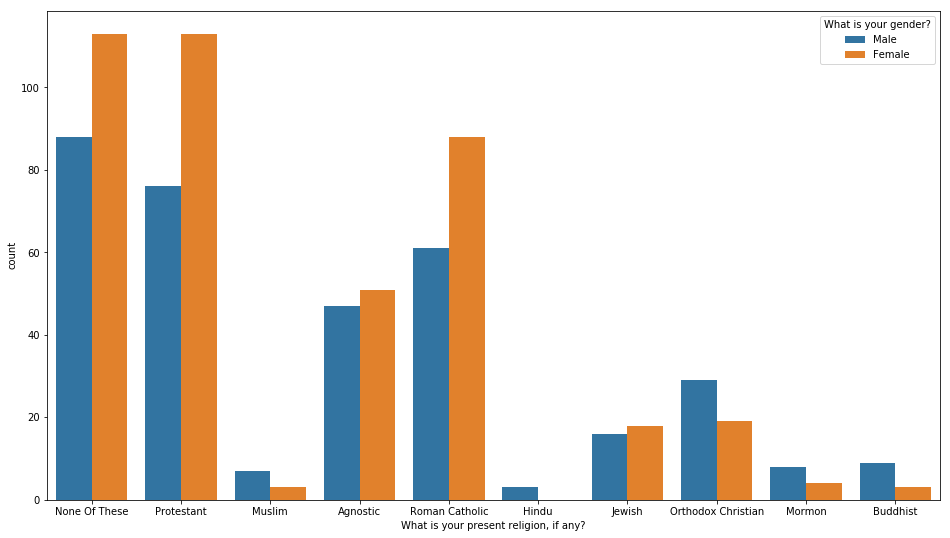

In [16]:
sns.countplot(data=df, x='What is your present religion, if any?', hue='What is your gender?')

#### 2.1.2. Present religion by age

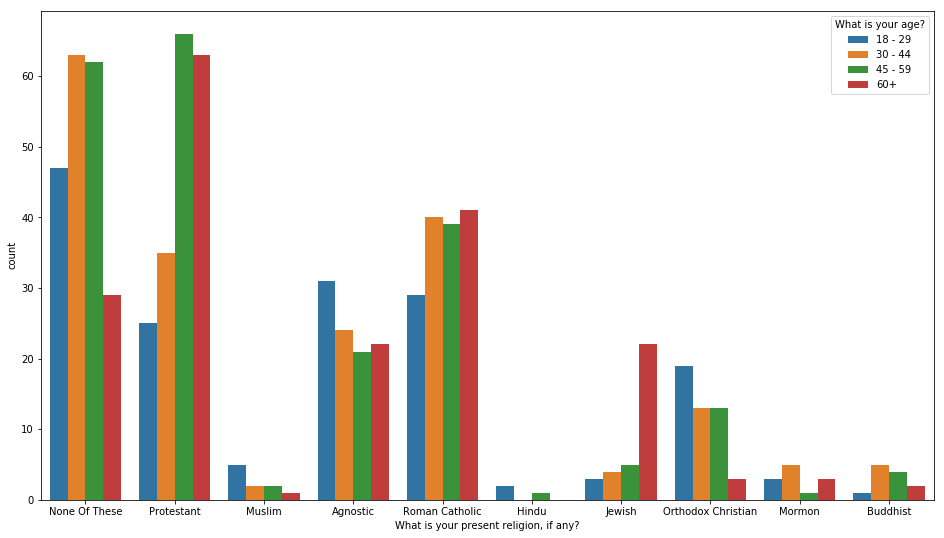

In [17]:
sns.countplot(data=df, x='What is your present religion, if any?', 
              hue_order=sorted(df['What is your age?'].unique()), 
              hue='What is your age?')

Religious identity across age groups shows a higher number of agnostics are aged 18 - 29, with middle-age range of 45 - 59 being the least common. Orthodox Christians and Muslims have a pattern that is almost similar to that of agnostics with a higher number of young people than older people. This is in contrast to Protestants and Roman Catholics that have lower frequencies in the lower age range (18 - 29) and higher frequencies in the upper age groups. Unidentified affiliations have high frequencies for the middle-age groups compared to the lower and upper age groups.

#### 2.1.3. Present religion and combined household income

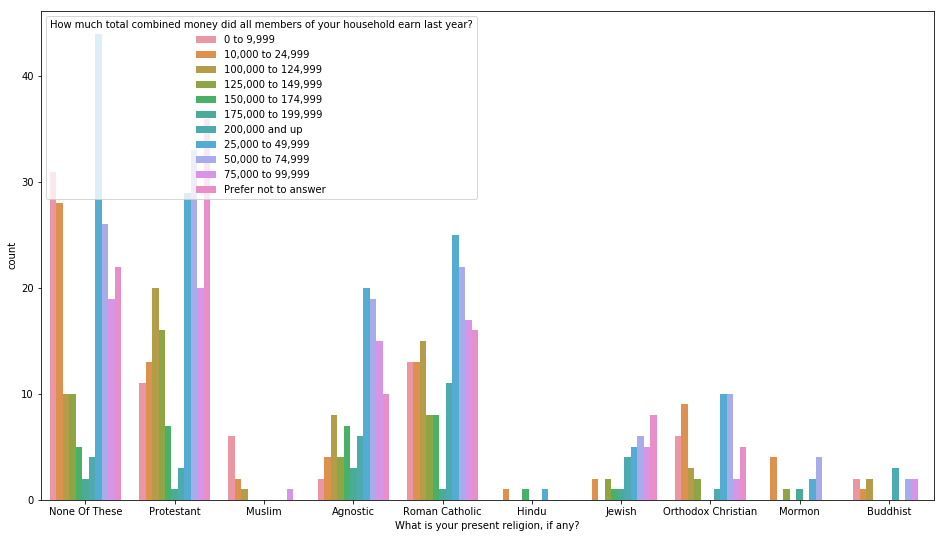

In [18]:
sns.countplot(data=df, 
              x='What is your present religion, if any?', 
              hue_order=sorted(df['How much total combined money did all members of your household earn last year?'].unique()),
              hue='How much total combined money did all members of your household earn last year?')

#### 2.1.4. Present religion and evangelism

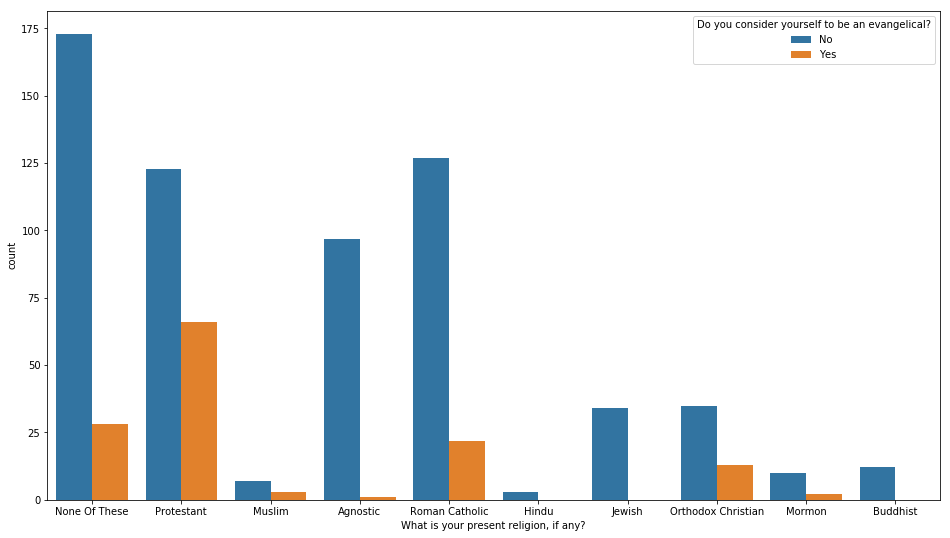

In [19]:
sns.countplot(data=df, x='What is your present religion, if any?', 
              hue='Do you consider yourself to be an evangelical?')

#### 2.1.5. Present religion and church attendance

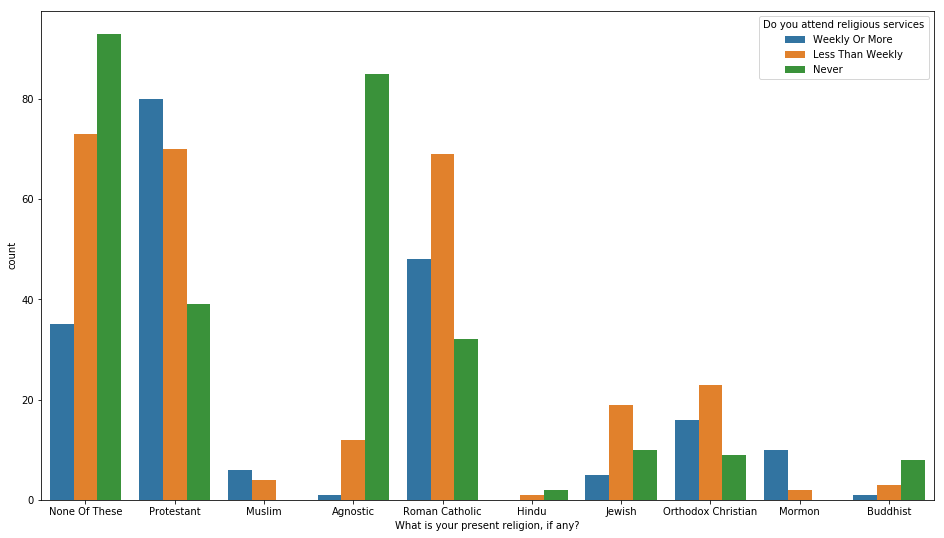

In [20]:
sns.countplot(data=df, x='What is your present religion, if any?',
              hue='Do you attend religious services')

#### 2.1.6. Protestants

In [21]:
protestants = df.loc[(df['What is your present religion, if any?'] == 'Protestant')]

##### 2.1.6.1. Protestants and public prayer

Text(0,0.5,'')

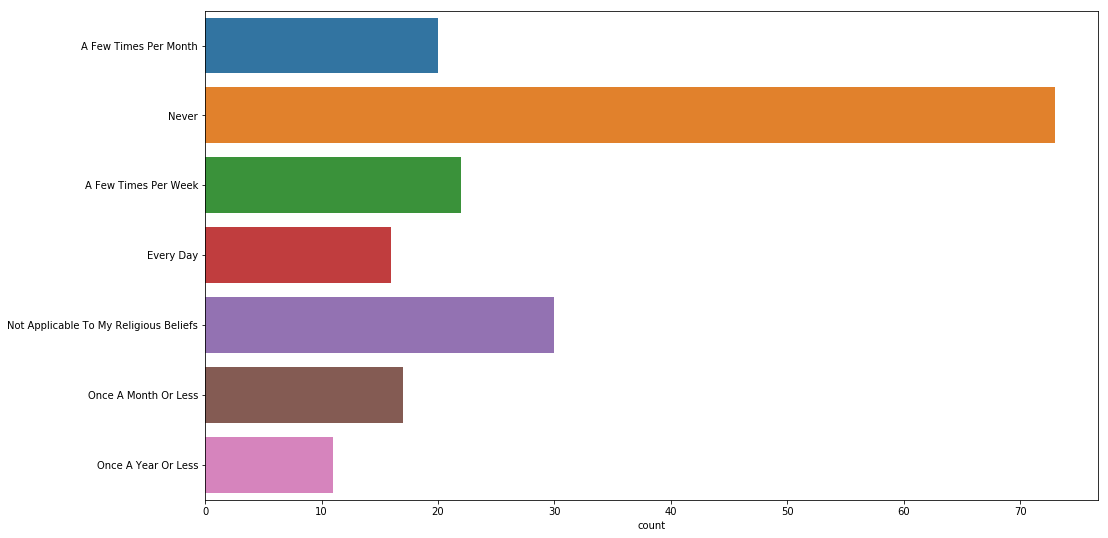

In [22]:
sns.countplot(data=protestants, 
              y='How often do you: pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)')
plt.ylabel('')

Text(0,0.5,'')

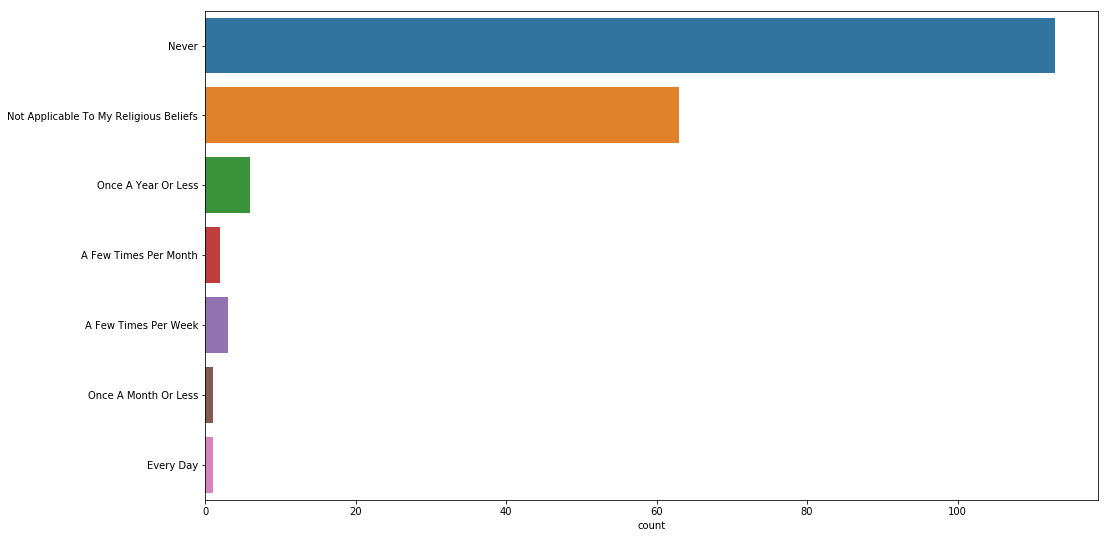

In [23]:
sns.countplot(data=protestants, 
              y='How often do you: pray in public using some kind of physical object (rosary, tefillin, etc)')
plt.ylabel('')

Text(123,0.5,'')

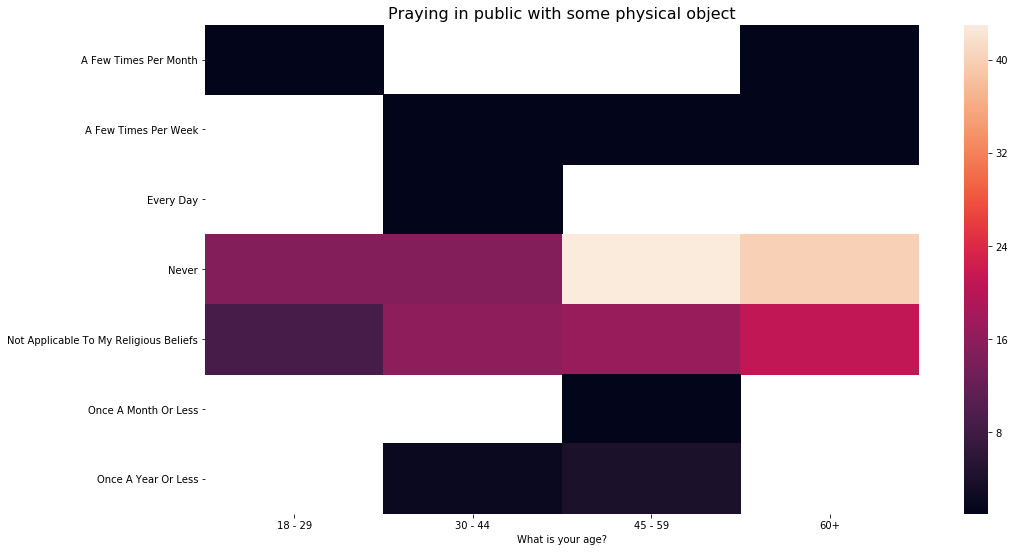

In [24]:
a = protestants.groupby(
    ['How often do you: pray in public using some kind of physical object (rosary, tefillin, etc)', 
     'What is your age?'])['What is your age?'].count().unstack('What is your age?')
sns.heatmap(a)
plt.title('Praying in public with some physical object', fontsize=16)
plt.ylabel('')

Text(123,0.5,'')

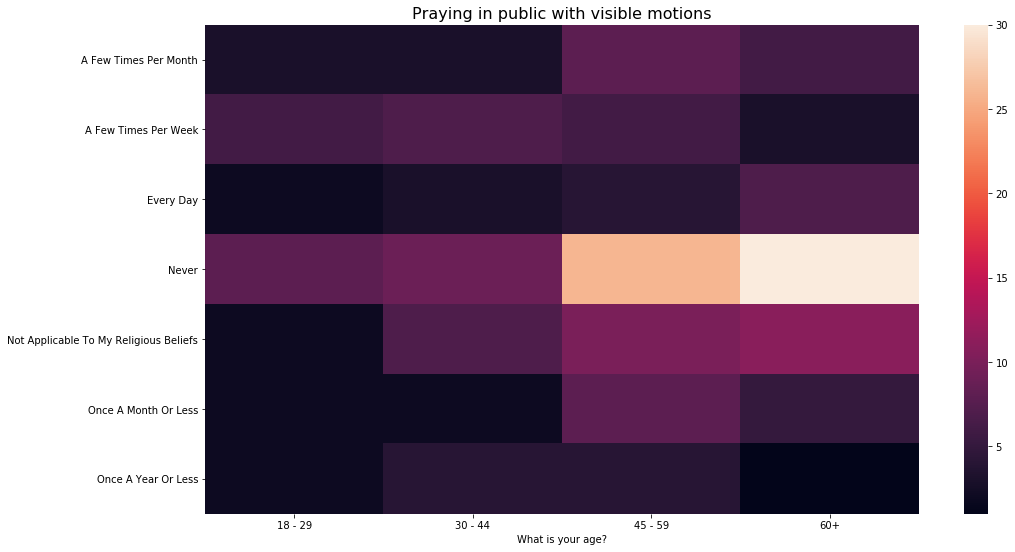

In [25]:
a = protestants.groupby(
    ['How often do you: pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)', 
     'What is your age?'])['What is your age?'].count().unstack('What is your age?')
sns.heatmap(a)
plt.title('Praying in public with visible motions', fontsize=16)
plt.ylabel('')

Protestants almost never pray in public with visible motions, whether in the form of a sign of a cross, bowing, prostration, shokeling etc. Respondents over the age of 60 contributed the highest number of _"Never"_ responses related to public displays of prayer. 
<br><br/>
On the other hand, low numbers of respondents (less than 5) were more common in the lowest age group (18 - 29 years old), while middle age (30 - 59 years old) having the largest contributions to praying in public.